In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

df=pd.read_parquet("../data_transformation/categorical_and_numerical_analysis.parquet")

In [40]:
df.head()

,invoice/item_number,date,store_number,store_name,store_location,county_number,county,category_name,vendor_number,vendor_name,...,volume_sold(gallons),category_number,address,city_zip,coordinates,city,zip_code,latitude,longitude,volume_sold(ml)
102,S08792800017,2019-11-06,2459,Reinhart Foods,200 STATE PO BOX 98\nGUTHRIE CENTER 50115\n,39.0,Guthrie,FLAVORED RUM,65,Jim Beam Brands,...,0.59,1062300.0,200 STATE PO BOX 98,GUTHRIE CENTER 50115,,GUTHRIE CENTER,50115,NaN,NaN,2233.3919
103,S04854100048,2019-04-03,2487,Anamosa Family Foods,"402 EAST MAIN\nANAMOSA 52205\n(42.108289, -91....",53.0,Jones,PEPPERMINT SCHNAPPS,434,Luxco-St Louis,...,1.39,1081300.0,402 EAST MAIN,ANAMOSA 52205,"42.108289, -91.281881",ANAMOSA,52205,42.108289,-91.281881,5261.7199
106,S08900500035,2019-11-13,4509,A J'S LIQUOR II,"2515 CHAMBERLAIN\nAMES 50010\n(42.02146, -93.6...",85.0,Story,MISC. AMERICAN CORDIALS & LIQUEURS,322,Prestige Wine and Spirits Group,...,2.38,1081900.0,2515 CHAMBERLAIN,AMES 50010,"42.02146, -93.650965",AMES,50010,42.021460,-93.650965,9009.2758
110,S06855800032,2019-07-31,2522,Hy-Vee Wine and Spirits,HWY 9 &amp; 71\nSPIRIT LAKE 51360\n,30.0,Dickinson,PUERTO RICO & VIRGIN ISLANDS RUM,35,"Bacardi U.S.A., Inc.",...,2.38,1062200.0,HWY 9 &amp; 71,SPIRIT LAKE 51360,,SPIRIT LAKE,51360,NaN,NaN,9009.2758
113,S08372100023,2019-10-16,3816,Swils,"200 E OAK ST\nRED OAK 51566\n(41.016691, -95.2...",69.0,Montgomery,VODKA FLAVORED,380,Phillips Beverage Company,...,2.38,1031200.0,200 E OAK ST,RED OAK 51566,"41.016691, -95.230032",RED OAK,51566,41.016691,-95.230032,9009.2758


# ANALYTIC CATEGORICAL

In [41]:
df_cat= df.select_dtypes(include= 'O')

In [42]:
df_cat.shape

(2073616, 12)

In [43]:
for col in df_cat.columns:
    print(f'{col.upper}')
    display (df[col].value_counts()/df.shape[0]*100)
    print('________________________')

<built-in method upper of str object at 0x00000197A46B3C70>


invoice/item_number
S09547600019    0.000048
S08168800011    0.000048
S05237900035    0.000048
S03899200075    0.000048
S07335200059    0.000048
                  ...   
S08372100023    0.000048
S06855800032    0.000048
S08900500035    0.000048
S04854100048    0.000048
S08792800017    0.000048
Name: count, Length: 2073616, dtype: float64

________________________
<built-in method upper of str object at 0x00000197A46B2EF0>


store_name
Hy-Vee Food Store          7.929289
Hy-Vee Wine and Spirits    6.730996
Hy-Vee Food Store #1       3.295258
Dahl's                     1.908405
Hy-Vee Drugstore           1.588288
                             ...   
Spirits And Ale, Inc.      0.000579
Direct Liquor              0.000482
Broadbent Distillery       0.000386
Big 10 Mart                0.000338
Werner Distilling          0.000096
Name: count, Length: 1081, dtype: float64

________________________
<built-in method upper of str object at 0x00000197A46B2470>


store_location
1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93.619787)                 1.420610
1823 E KIMBERLY RD\nDAVENPORT 52807\n(41.556781, -90.548919)           0.854980
3221 SE 14TH ST\nDES MOINES 50320\n(41.554101, -93.596754)             0.848277
1720 WATERFRONT DR\nIOWA CITY 52240\n(41.64277, -91.530467)            0.762388
1025 NORTH QUINCY AVE\nOTTUWMA 52501\n(41.015384, -92.438455)          0.569151
                                                                         ...   
211 MAIN ST\nALVORD 51230\n(43.344357, -96.301894)                     0.000482
304 4TH ST\nFONTANELLE 50846\n(41.289877, -94.562737)                  0.000434
6175 50TH AVE\nNORWALK 50211\n(41.436453, -93.712273)                  0.000386
4141 CENTERPOINT RD NE\nCEDAR RAPIDS 52402\n(42.021302, -91.665352)    0.000338
5520 190th St.\nHolstein 51025\n(42.428369, -95.515071)                0.000096
Name: count, Length: 1207, dtype: float64

________________________
<built-in method upper of str object at 0x0000019761A44210>


county
Polk          17.352972
Linn           8.231948
Scott          6.509595
Black Hawk     5.138849
Johnson        5.032224
                ...    
Adams          0.096305
Decatur        0.091242
Ringgold       0.071084
Davis          0.066358
Fremont        0.007764
Name: count, Length: 99, dtype: float64

________________________
<built-in method upper of str object at 0x00000197A46B1EB0>


category_name
VODKA 80 PROOF                12.301410
CANADIAN WHISKIES              8.825790
SPICED RUM                     5.312989
STRAIGHT BOURBON WHISKIES      5.183747
VODKA FLAVORED                 4.877181
                                ...    
ANISETTE                       0.016782
AMARETTO - IMPORTED            0.000530
HIGH PROOF BEER - AMERICAN     0.000530
SCHNAPPS - IMPORTED            0.000289
IMPORTED VODKA - CHERRY        0.000145
Name: count, Length: 71, dtype: float64

________________________
<built-in method upper of str object at 0x00000197A46B15B0>


vendor_name
Diageo Americas                     16.951885
Luxco-St Louis                      11.435145
Jim Beam Brands                     10.689298
Pernod Ricard USA/Austin Nichols     6.423996
Sazerac North America                5.280534
                                      ...    
Domaine Charbay                      0.000048
Bendistillery                        0.000048
Dorado, Pizzorni & Sons, LLC         0.000048
Van Gogh Imports                     0.000048
Barrel House Distilling Co.          0.000048
Name: count, Length: 120, dtype: float64

________________________
<built-in method upper of str object at 0x00000197A46B28B0>


item_description
Black Velvet                   2.533208
Hawkeye Vodka                  2.286055
Five O'clock Vodka             1.909611
Captain Morgan Spiced Rum      1.338242
Seagrams 7 Crown Bl Whiskey    1.319965
                                 ...   
Boston Peppermint Schnapps     0.000048
Jean Marc Xo Vodka             0.000048
Cruzan Black Strap             0.000048
Ice Hole Exotic Schnapps       0.000048
Regency Da Vinci               0.000048
Name: count, Length: 2333, dtype: float64

________________________
<built-in method upper of str object at 0x0000019761A22400>


address
1460 2ND AVE              1.420610
3221 SE 14TH ST           1.164295
1823 E KIMBERLY RD        0.854980
1720 WATERFRONT DR        0.762388
1025 NORTH QUINCY AVE     0.569151
                            ...   
211 MAIN ST               0.000482
304 4TH ST                0.000434
6175 50TH AVE             0.000386
4141 CENTERPOINT RD NE    0.000338
5520 190th St.            0.000096
Name: count, Length: 1201, dtype: float64

________________________
<built-in method upper of str object at 0x00000197B55FF970>


city_zip
IOWA CITY 52240         2.602989
CEDAR RAPIDS 52402      2.349133
AMES 50010              2.074251
DES MOINES 50314        2.025737
COUNCIL BLUFFS 51501    1.734699
                          ...   
POMEROY 50575           0.003183
BURLINGTON 56201        0.002942
MURRAY 50174            0.002845
ALVORD 51230            0.000482
Holstein 51025          0.000096
Name: count, Length: 401, dtype: float64

________________________
<built-in method upper of str object at 0x00000197B55FF8F0>


coordinates
                         7.956439
41.60566, -93.619787     1.420610
41.556781, -90.548919    0.854980
41.554101, -93.596754    0.848277
41.64277, -91.530467     0.762388
                           ...   
43.269279, -91.476658    0.000627
41.83226, -94.106562     0.000579
43.344357, -96.301894    0.000482
41.436453, -93.712273    0.000386
42.428369, -95.515071    0.000096
Name: count, Length: 1108, dtype: float64

________________________
<built-in method upper of str object at 0x0000019761A201B0>


city
DES MOINES      8.847926
CEDAR RAPIDS    6.332947
DAVENPORT       4.811884
IOWA CITY       3.251663
WATERLOO        3.200255
                  ...   
NASHUA          0.003520
POMEROY         0.003183
MURRAY          0.002845
ALVORD          0.000482
Holstein        0.000096
Name: count, Length: 348, dtype: float64

________________________
<built-in method upper of str object at 0x00000197B55FD4B0>


zip_code
52240    2.602989
52402    2.349133
50010    2.074251
50314    2.025737
50317    1.769325
           ...   
50658    0.003520
50575    0.003183
56201    0.002942
50174    0.002845
51230    0.000482
Name: count, Length: 377, dtype: float64

________________________


## Categorical Analysis

- Invoice / Item Number: All categories have the same frequency, as the percentage is identical for each one.

- Store Name: There are 392 unique categories, with the most prominent being Hy-Vee Food Store and Hy-Vee Wine and Spirits.

- County: There are 89 different counties, with the most notable ones being: Polk (17.35%),Linn (8.2%),Black Hawk (5.1%),Scott (6.5%),Johnson (5.03%)

- Category Name: The most prominent categories are: Vodka 80 Proof (12.3%),Canadian Whisky (8.8%)

-  Vendor Name: The top vendors are Diageo Americas (16.9%),Luxco - St. Louis (11.4%),Jim Beam Brands (10.68%)

- Item Description: No standout categories.

- Address: No standout categories.

- City: Most prominent cities are: Des Moines (8.8%),Cedar Rapids (6.3%),Davenport (4.8%)

# ANALYTIC NUMERIC

In [44]:
df_num= df.select_dtypes(include=np.number)

In [45]:
df_num.shape

(2073616, 15)

IndexError: index 10 is out of bounds for axis 0 with size 10

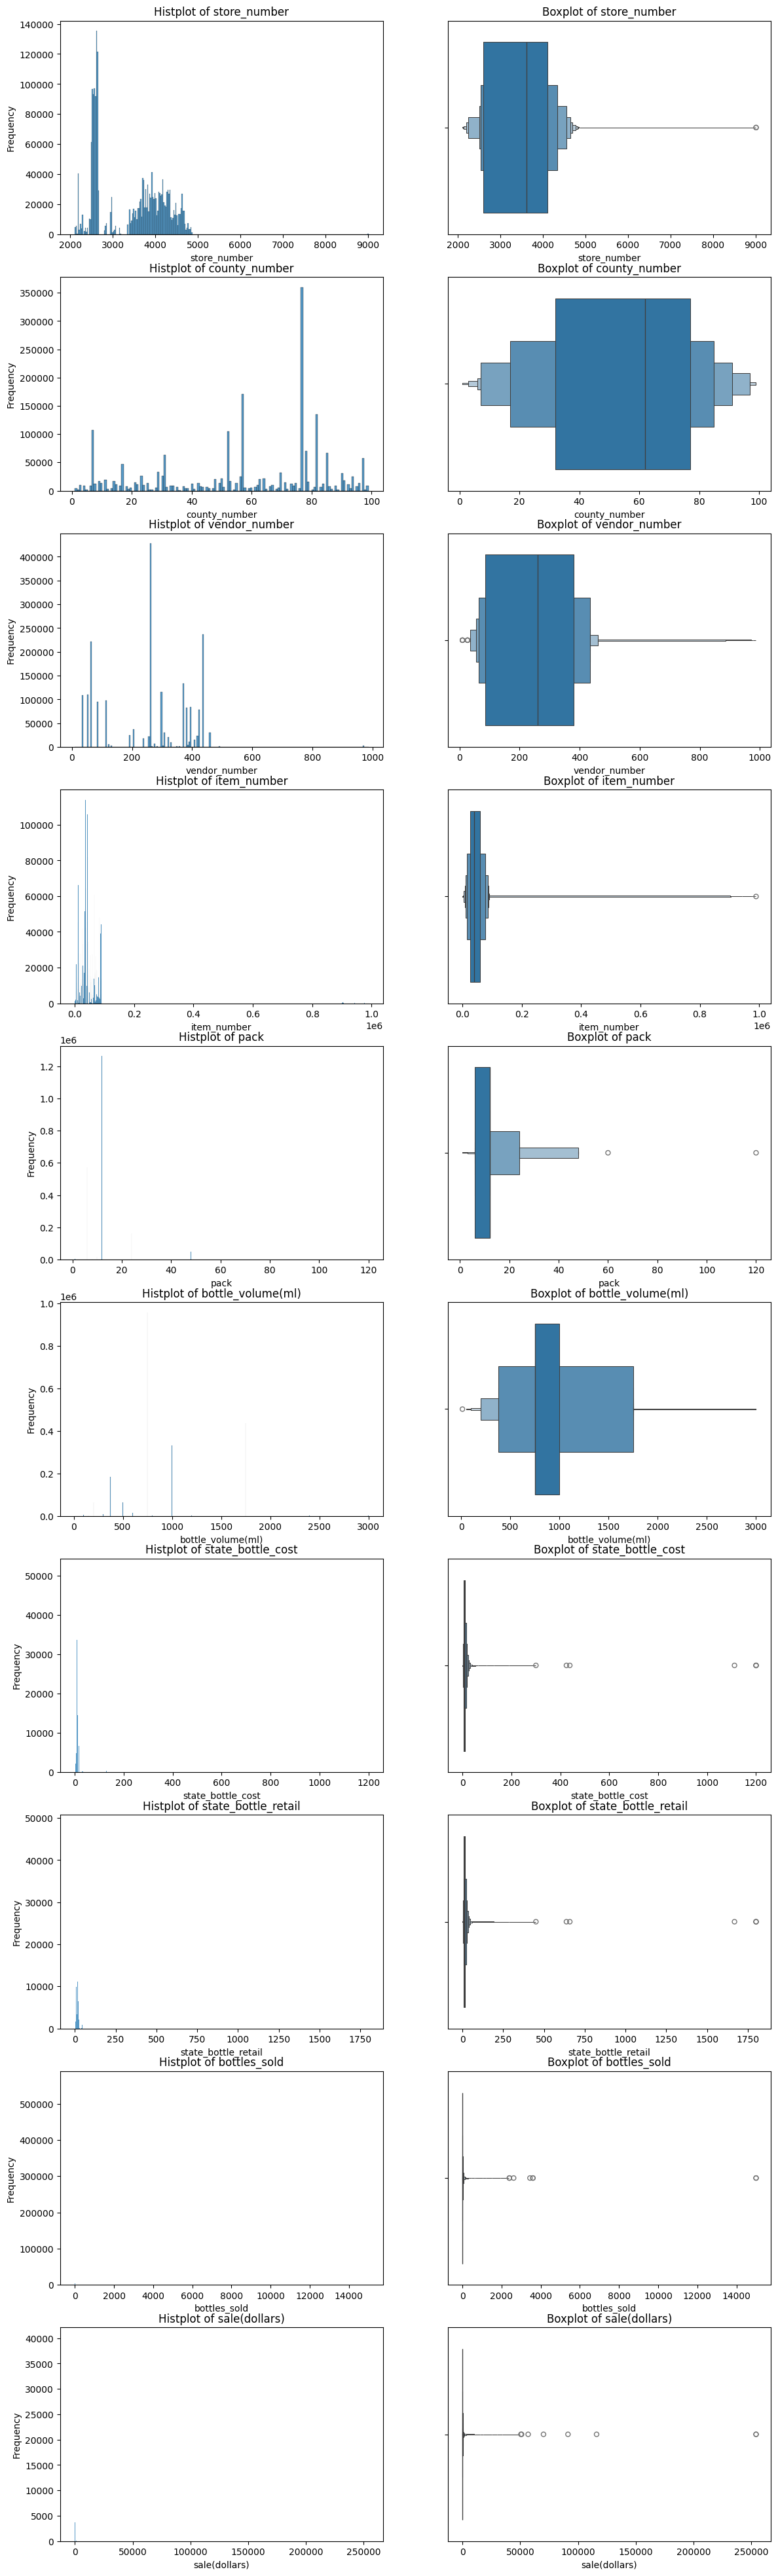

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(14, 50))

for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histplot of {col}')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(col)

    sns.boxenplot(data=df_num, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)
    
plt.tight_layout()  
plt.show()  

## Numerical Analysis
- Pack:  2 outliers, and they appear around values of 60 and 120.

- Bottle_volume: There are lower outliers, which might make sense due to mini bottles, but most data points are between 25 ml and 1800 ml.

- State_bottle_cost and State Bottle Retail: These are almost identical; the difference is that the retail value is higher because it's the in-store marked-up price.

- bottle_sales: Contains high outliers.

- Volume_Sold_(gallons): Very similar to the previous one, and Volume Sold (ml) has a similar shape, since both come from the same calculation.

In [47]:
df.columns

Index(['invoice/item_number', 'date', 'store_number', 'store_name',
       'store_location', 'county_number', 'county', 'category_name',
       'vendor_number', 'vendor_name', 'item_number', 'item_description',
       'pack', 'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'volume_sold(gallons)',
       'category_number', 'address', 'city_zip', 'coordinates', 'city',
       'zip_code', 'latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [48]:
df.drop(columns=['store_location','volume_sold(gallons)'],inplace=True)

## outliers

In [49]:
round(df[df['pack'] > 20].shape[0] / df.shape[0] * 100, 4)

10.2115

In [50]:
round(df[df['bottles_sold'] > 400].shape[0] / df.shape[0] * 100, 4)

0.0595

In [51]:
round(df[df['sale(dollars)'] > 10000].shape[0] / df.shape[0] * 100, 4)

0.0247

In [52]:
round(df[df['volume_sold(ml)'] > 400000].shape[0] / df.shape[0] * 100, 4)

0.0838

In [53]:
round(df[df['bottle_volume(ml)'] > 2500].shape[0] / df.shape[0] * 100, 4)

0.1397

In [54]:
round(df[df['state_bottle_cost'] > 50].shape[0] / df.shape[0] * 100, 4)

0.1048

In [55]:
round(df[df['state_bottle_retail'] > 75].shape[0] / df.shape[0] * 100, 4)

0.1048

In [56]:
df=df[df['bottles_sold'] < 400]
df=df[df['sale(dollars)'] < 10000]
df=df[df['volume_sold(ml)'] < 400000]
df=df[df['bottle_volume(ml)'] < 2500]
df= df[df['state_bottle_retail'] < 75]
df= df[df['state_bottle_cost'] < 50]


In [57]:
df.shape

(2066768, 26)

In [58]:
df.columns

Index(['invoice/item_number', 'date', 'store_number', 'store_name',
       'county_number', 'county', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'category_number', 'address',
       'city_zip', 'coordinates', 'city', 'zip_code', 'latitude', 'longitude',
       'volume_sold(ml)'],
      dtype='object')

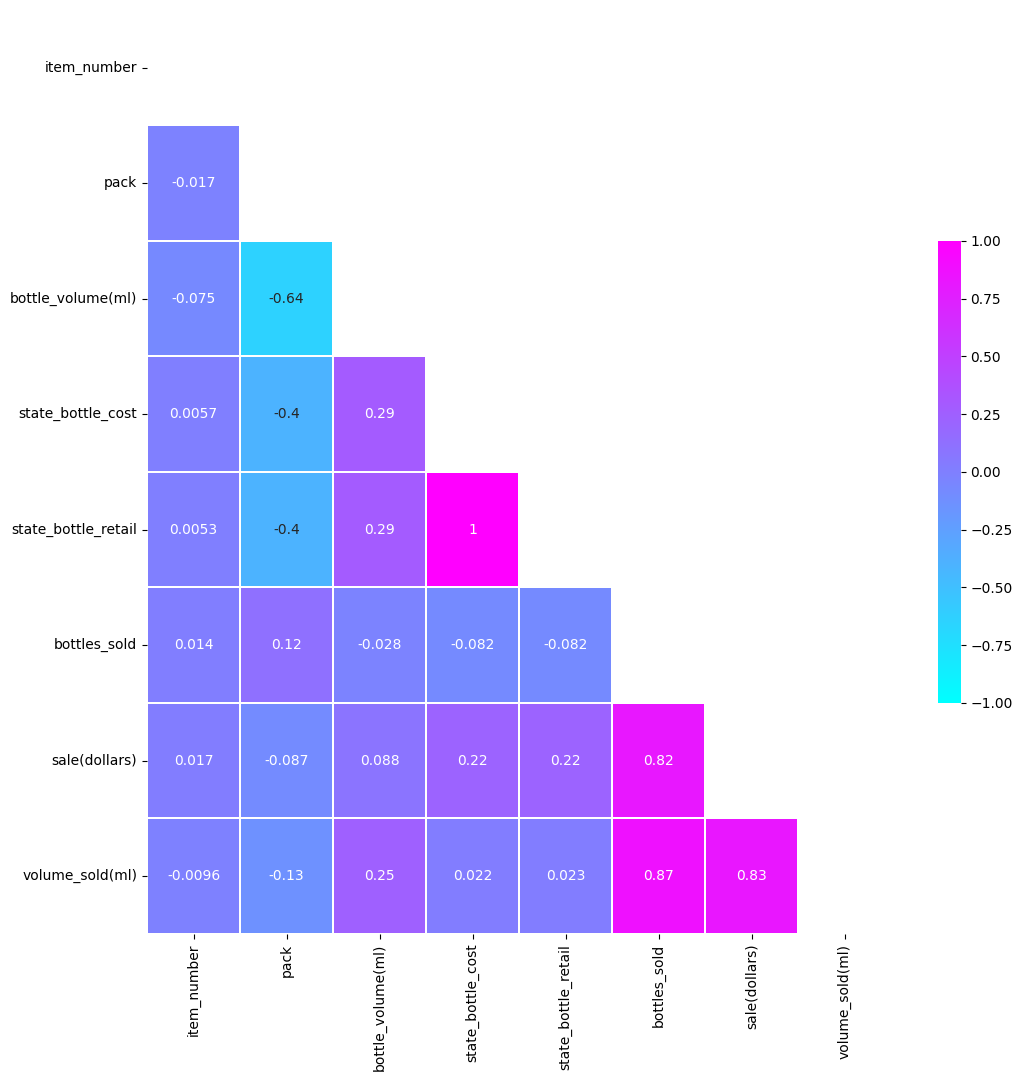

In [59]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap="cool", linewidths=0.2, cbar_kws={"shrink": 0.50}, mask=mask)
plt.show()

# Correlation Matrix Findings

- state_bottle_cost and state_bottle_retail exhibit a moderate negative correlation with pack (same value).
- pack shows a moderate negative correlation with bottle_volume (ml).
- bottle_volume(ml) is positively correlated with both state_bottle_retail and state_bottle_cost.
- state_bottle_cost and state_bottle_retail are perfectly positively correlated.
- bottle_sold correlates with sales (dollars).
- sales(dollars) correlates with volume_sold.

In [60]:
df.columns

Index(['invoice/item_number', 'date', 'store_number', 'store_name',
       'county_number', 'county', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'category_number', 'address',
       'city_zip', 'coordinates', 'city', 'zip_code', 'latitude', 'longitude',
       'volume_sold(ml)'],
      dtype='object')

In [61]:
df.drop(columns=['store_number','county_number','category_number','vendor_number'],inplace= True)

In [62]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city_zip', 'coordinates',
       'city', 'zip_code', 'latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [63]:
df.head()

,invoice/item_number,date,store_name,county,category_name,vendor_name,item_number,item_description,pack,bottle_volume(ml),...,bottles_sold,sale(dollars),address,city_zip,coordinates,city,zip_code,latitude,longitude,volume_sold(ml)
102,S08792800017,2019-11-06,Reinhart Foods,Guthrie,FLAVORED RUM,Jim Beam Brands,44499,Cruzan Mango Rum,12,750,...,3,30.72,200 STATE PO BOX 98,GUTHRIE CENTER 50115,,GUTHRIE CENTER,50115,NaN,NaN,2233.3919
103,S04854100048,2019-04-03,Anamosa Family Foods,Jones,PEPPERMINT SCHNAPPS,Luxco-St Louis,80578,Arrow Peppermint Schnapps,6,1750,...,3,31.68,402 EAST MAIN,ANAMOSA 52205,"42.108289, -91.281881",ANAMOSA,52205,42.108289,-91.281881,5261.7199
106,S08900500035,2019-11-13,A J'S LIQUOR II,Story,MISC. AMERICAN CORDIALS & LIQUEURS,Prestige Wine and Spirits Group,75210,Kinky Liqueur,6,750,...,12,180.00,2515 CHAMBERLAIN,AMES 50010,"42.02146, -93.650965",AMES,50010,42.021460,-93.650965,9009.2758
110,S06855800032,2019-07-31,Hy-Vee Wine and Spirits,Dickinson,PUERTO RICO & VIRGIN ISLANDS RUM,"Bacardi U.S.A., Inc.",43125,Bacardi Superior Rum Pet,12,750,...,12,135.60,HWY 9 &amp; 71,SPIRIT LAKE 51360,,SPIRIT LAKE,51360,NaN,NaN,9009.2758
113,S08372100023,2019-10-16,Swils,Montgomery,VODKA FLAVORED,Phillips Beverage Company,41693,Uv Blue (raspberry) Vodka,12,750,...,12,113.88,200 E OAK ST,RED OAK 51566,"41.016691, -95.230032",RED OAK,51566,41.016691,-95.230032,9009.2758


In [69]:
df_lat_long = df[(df['latitude'].notnull()) & (df['longitude'].notnull())]

In [70]:
df_lat_long.head()

,invoice/item_number,date,store_name,county,category_name,vendor_name,item_number,item_description,pack,bottle_volume(ml),...,bottles_sold,sale(dollars),address,city_zip,coordinates,city,zip_code,latitude,longitude,volume_sold(ml)
103,S04854100048,2019-04-03,Anamosa Family Foods,Jones,PEPPERMINT SCHNAPPS,Luxco-St Louis,80578,Arrow Peppermint Schnapps,6,1750,...,3,31.68,402 EAST MAIN,ANAMOSA 52205,"42.108289, -91.281881",ANAMOSA,52205,42.108289,-91.281881,5261.7199
106,S08900500035,2019-11-13,A J'S LIQUOR II,Story,MISC. AMERICAN CORDIALS & LIQUEURS,Prestige Wine and Spirits Group,75210,Kinky Liqueur,6,750,...,12,180.00,2515 CHAMBERLAIN,AMES 50010,"42.02146, -93.650965",AMES,50010,42.021460,-93.650965,9009.2758
113,S08372100023,2019-10-16,Swils,Montgomery,VODKA FLAVORED,Phillips Beverage Company,41693,Uv Blue (raspberry) Vodka,12,750,...,12,113.88,200 E OAK ST,RED OAK 51566,"41.016691, -95.230032",RED OAK,51566,41.016691,-95.230032,9009.2758
116,S05702000043,2019-05-24,Smokin' Joe's #14 Tobacco and Liquor,Linn,CANADIAN WHISKIES,Diageo Americas,11296,Crown Royal,12,750,...,1,21.74,225 EDGEWOOD RD,CEDAR RAPIDS 52405,"41.973418, -91.715955",CEDAR RAPIDS,52405,41.973418,-91.715955,757.0820
117,S05590100008,2019-05-17,Super Target T-0533,Scott,IMPORTED DRY GINS,Diageo Americas,28866,Tanqueray Gin,12,750,...,12,215.88,5225 ELMORE AVE,DAVENPORT 52807,"41.573626, -90.528589",DAVENPORT,52807,41.573626,-90.528589,9009.2758


In [71]:
df[["latitude","longitude"]]

,latitude,longitude
102,NaN,NaN
103,42.108289,-91.281881
106,42.021460,-93.650965
110,NaN,NaN
113,41.016691,-95.230032
...,...,...
8197488,42.056601,-92.908100
8197490,41.858483,-90.184946
8197495,41.976952,-91.632647
8197502,42.023145,-93.715664


In [73]:
df_map = df_lat_long.groupby(['latitude', 'longitude'])['sale(dollars)'].sum().reset_index()

In [74]:
df_map.head()

,latitude,longitude,sale(dollars)
0,30.179733,-92.501378,17497.94
1,33.526290,-91.436068,30955.31
2,40.399780,-91.387531,806889.87
3,40.401681,-91.389504,8332.74
4,40.408818,-91.396885,182711.92


In [75]:
print(df[["latitude", "longitude"]].notnull().all(axis=1).sum())

1902328


In [ ]:
df_map.head()

,Latitude,longitude,sale(dollars)
0,42.108289,-91.281881,2.365923e+08


In [77]:
fig = px.scatter_map(df_map, 
                     lat='latitude', 
                     lon='longitude', 
                     size='sale(dollars)',
                     zoom=3, 
                     map_style='open-street-map')  
fig.show()

In [78]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city_zip', 'coordinates',
       'city', 'zip_code', 'latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [80]:
df_map_sales= df_lat_long.groupby(['latitude','longitude'])['invoice/item_number'].count().reset_index()

In [82]:
fig = px.scatter_mapbox(df_map_sales, lat = 'latitude', lon = 'longitude', size = 'invoice/item_number',
                        zoom = 3, mapbox_style = 'open-street-map')
                        
fig.show()

C:\Users\ivanc\AppData\Local\Temp\ipykernel_21336\2323206392.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Evolution of sales and long-term profits

In [83]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city_zip', 'coordinates',
       'city', 'zip_code', 'latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [84]:
df_data_sales= df.groupby(df['date'].dt.to_period('M'))['invoice/item_number'].count().reset_index()
df_data_sales['date']= df_data_sales['date'].dt.to_timestamp()

<Axes: xlabel='date', ylabel='invoice/item_number'>

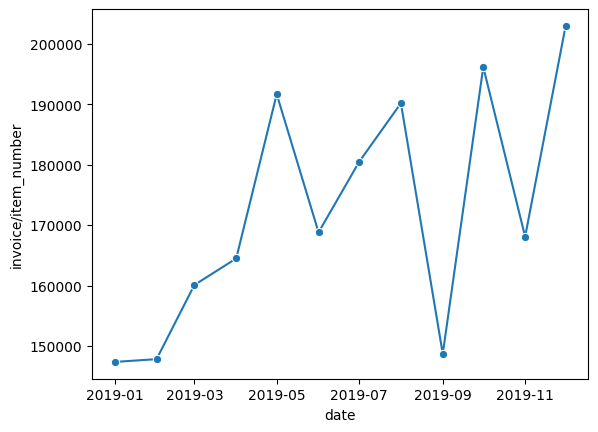

In [85]:
sns.lineplot(x = "date", y = "invoice/item_number", data = df_data_sales,
             marker = "o")


In [86]:
df_data_sales_profit = df.groupby(df['date'].dt.to_period('M'))['sale(dollars)'].sum().reset_index()
df_data_sales_profit['date']= df_data_sales_profit['date'].dt.to_timestamp()

<Axes: xlabel='date', ylabel='sale(dollars)'>

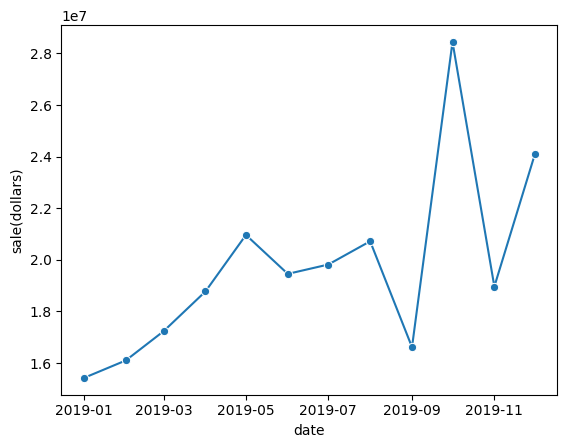

In [87]:
sns.lineplot(x = "date", y = "sale(dollars)", data = df_data_sales_profit, marker = "o")

## Sales and profits over time
- From March to May, there was an increase in sales reflected in the profits. 
- The same occurred during the period from June to July. 
- In September, both sales and profits dropped (check what happened during that period).
-  In October, the number of sales recovered and the profit margin surged. 
- In November, the same situation as in September occurred, meaning a decline. 
- December was the month with the highest sales, but the second highest in terms of profits

## Study of correlation variables

     pack and state_bottle

<Axes: xlabel='pack', ylabel='state_bottle_cost'>

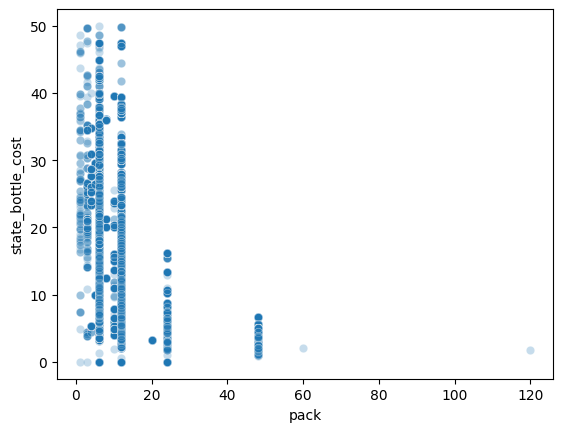

In [88]:
sns.scatterplot(x= "pack", y= "state_bottle_cost", data= df, alpha=0.25)

    pack and bottle_volume(ml)

<Axes: xlabel='pack', ylabel='bottle_volume(ml)'>

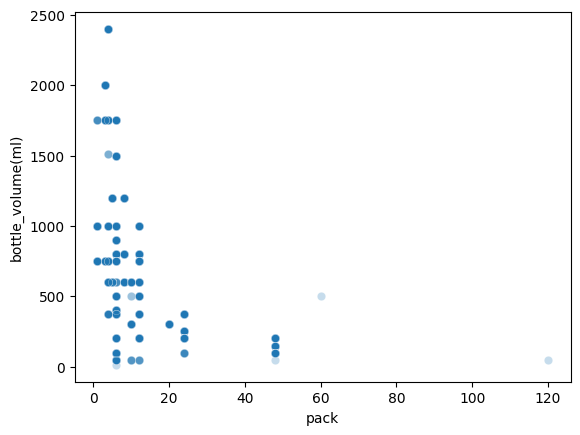

In [89]:
sns.scatterplot(x= "pack", y= "bottle_volume(ml)", data= df, alpha=0.25)

    bottle_volume(ml) and state_bottle

<Axes: xlabel='bottle_volume(ml)', ylabel='state_bottle_cost'>

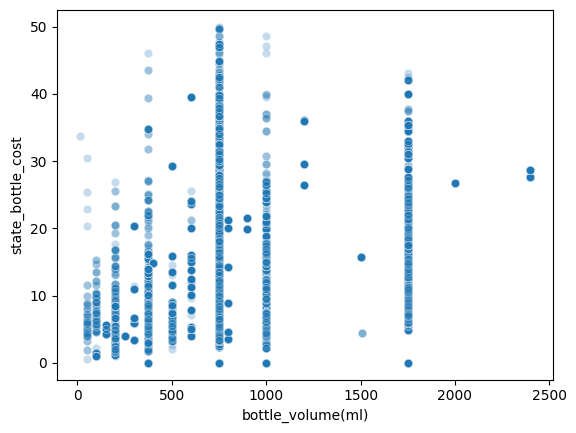

In [ ]:
sns.scatterplot(x= "bottle_volume(ml)", y= "state_bottle_cost", data= df, alpha=0.25)

    bottle_sold and sales(dollars)

<Axes: xlabel='bottles_sold', ylabel='sale(dollars)'>

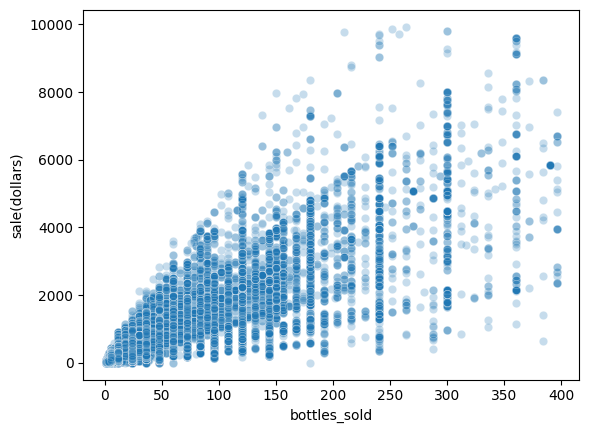

In [ ]:
sns.scatterplot(x= "bottles_sold", y= "sale(dollars)", data= df, alpha=0.25)

    bottle_sold and volume_sold(ml)

<Axes: xlabel='bottles_sold', ylabel='volume_sold(ml)'>

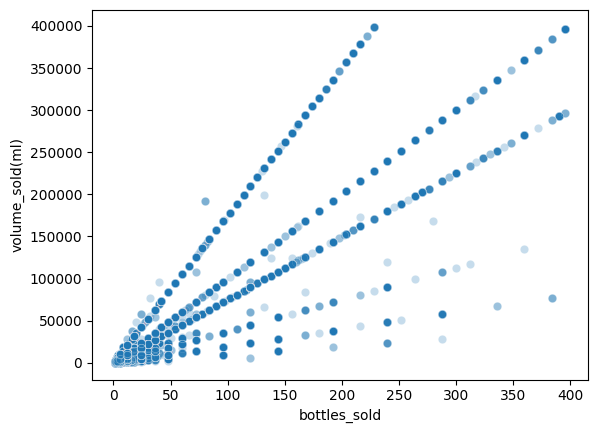

In [ ]:
sns.scatterplot(x= "bottles_sold", y= "volume_sold(ml)", data= df, alpha=0.25)

In [90]:
df.to_parquet("../data_transformation/dataset_cleaned.parquet")